In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve

from librosa.core import stft
from librosa.core import istft
from librosa import amplitude_to_db, db_to_amplitude
from librosa.display import specshow
from librosa.output import write_wav

from scipy.signal import butter, lfilter, csd

from utils import apply_reverb, read_wav
import corpus
import mir_eval

import pyroomacoustics as pra

#circle array diam 7.97 cm approx 8 cm 3.14 inch

3D case

(0, 6)

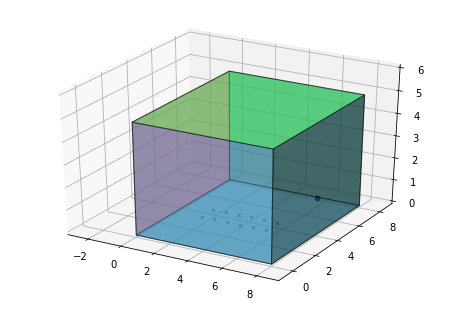

In [32]:
corners = np.array([[0,0], [0,8], [8,8], [8,0]]).T  # [x,y]
room = pra.Room.from_corners(corners)
room.extrude(5.)

s1, s2 = map(read_wav, corpus.experiment_files_timit())

if len(s1) > len(s2):
    pad_length = len(s1) - len(s2)
    s2 = np.pad(s2, (0,pad_length), 'reflect')
else:
    pad_length = len(s2) - len(s1)
    s1 = np.pad(s1, (0,pad_length), 'reflect')

room.add_source([8.,4.,1.6], signal=s1)
# room.add_source([2.,4.,1.6], signal=s2)
#[[X],[Y],[Z]]
R = np.asarray([[3.25,4.,4.75,5.5,6.25,7.,3.25,4.,4.75,5.5,6.25,7.],[2.,2.,2.,2.,2.,2.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]])
room.add_microphone_array(pra.MicrophoneArray(R, room.fs))
    
fig, ax = room.plot()
ax.set_xlim([-3, 9])
ax.set_ylim([-1, 9])
ax.set_zlim([0, 6])

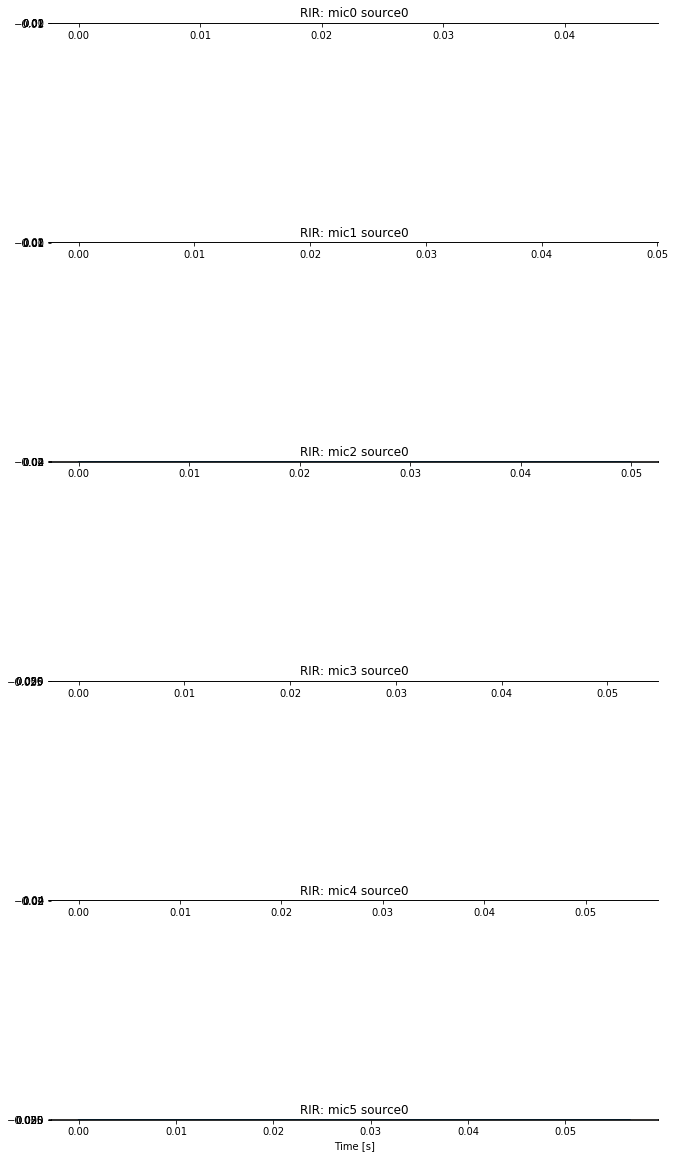

In [8]:
# room.plot_rir()
# fig = plt.gcf()
# fig.set_size_inches(10, 20)

In [33]:
room.simulate()
print(room.mic_array.signals.shape)

(12, 47254)


In [34]:
nfft=2048
win = 1024
hop = int(nfft/8)

X1 = stft(s1, n_fft=nfft, hop_length=hop, win_length=win)
Y1 = stft(room.mic_array.signals[0], n_fft=nfft, hop_length=hop, win_length=win) #3.25,2
Y2 = stft(room.mic_array.signals[1], n_fft=nfft, hop_length=hop, win_length=win) #4.,2
Y3 = stft(room.mic_array.signals[2], n_fft=nfft, hop_length=hop, win_length=win) #4.75,2
Y4 = stft(room.mic_array.signals[3], n_fft=nfft, hop_length=hop, win_length=win) #5.5,2
Y5 = stft(room.mic_array.signals[4], n_fft=nfft, hop_length=hop, win_length=win) #6.25,2
Y6 = stft(room.mic_array.signals[5], n_fft=nfft, hop_length=hop, win_length=win) #7.,2
Y11 = stft(room.mic_array.signals[6], n_fft=nfft, hop_length=hop, win_length=win) #3.25,1
Y12 = stft(room.mic_array.signals[7], n_fft=nfft, hop_length=hop, win_length=win) #4.,1
Y13 = stft(room.mic_array.signals[8], n_fft=nfft, hop_length=hop, win_length=win) #4.75,1
Y14 = stft(room.mic_array.signals[9], n_fft=nfft, hop_length=hop, win_length=win) #5.5,1
Y15 = stft(room.mic_array.signals[10], n_fft=nfft, hop_length=hop, win_length=win) #6.25,1
Y16 = stft(room.mic_array.signals[11], n_fft=nfft, hop_length=hop, win_length=win) #7.,1

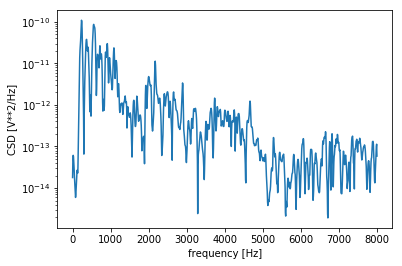

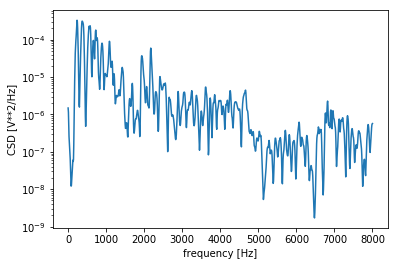

In [35]:
f, Pyy = csd(room.mic_array.signals[0], room.mic_array.signals[6], 16000, nperseg=win, nfft=nfft, noverlap=hop)
plt.semilogy(f, np.abs(Pyy))
plt.xlabel('frequency [Hz]')
plt.ylabel('CSD [V**2/Hz]')
plt.show()

Pyy = np.conj(Y1)*Y1
plt.semilogy(f, np.abs(np.mean(Pyy,axis=1)))
plt.xlabel('frequency [Hz]')
plt.ylabel('CSD [V**2/Hz]')
plt.show()

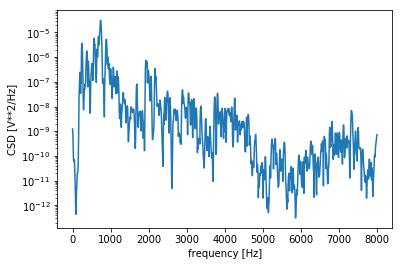

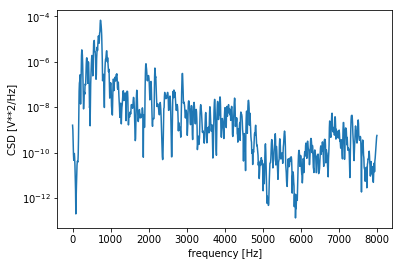

In [41]:
nfft=2048
win = 1024
hop = int(nfft/8)
Y1 = stft(room.mic_array.signals[0,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #3.25
Y2 = stft(room.mic_array.signals[1,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #4.
Y3 = stft(room.mic_array.signals[2,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #4.75
Y4 = stft(room.mic_array.signals[3,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #5.5
Y5 = stft(room.mic_array.signals[4,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #6.25
Y6 = stft(room.mic_array.signals[5,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #7.
Y11 = stft(room.mic_array.signals[6,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #3.25,1
Y12 = stft(room.mic_array.signals[7,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #4.,1
Y13 = stft(room.mic_array.signals[8,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #4.75,1
Y14 = stft(room.mic_array.signals[9,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #5.5,1
Y15 = stft(room.mic_array.signals[10,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #6.25,1
Y16 = stft(room.mic_array.signals[11,:len(s1)], n_fft=nfft, hop_length=hop, win_length=win) #7.,1
X1 = stft(s1, n_fft=nfft, hop_length=hop, win_length=win)


Gxx = X1 * np.conj(X1)
Gy123 = Y1 * Y2 * np.conj(Y3)
Gy456 = Y4 * Y5 * np.conj(Y6)
Gy135 = Y1 * Y3 * np.conj(Y5)
Gy246 = Y2 * Y4 * np.conj(Y6)
Gxy = X1 *  np.conj(Y1)
Gy16 = Y1 *  np.conj(Y16)
Gy25 = Y2 *  np.conj(Y5)
Gy34 = Y3 *  np.conj(Y4)
Gyx = Y1 * np.conj(X1)
Gyy1 = Y1 * np.conj(Y1)
Gyy2 = Y2 * np.conj(Y2)
Gyy3 = Y3 * np.conj(Y3)
Gyy5 = Y5 * np.conj(Y5)

maskY123 = np.divide(Gy123, np.sqrt(np.multiply(Gyy1,np.multiply(Gyy2,Gyy3))))
maskY135 = np.divide(Gy135, np.sqrt(np.multiply(Gyy1,Gyy5)))
maskY16 = np.divide(Gy16, Gyy1)


plt.semilogy(f, np.abs(np.mean(Gy123,axis=1)))
plt.xlabel('frequency [Hz]')
plt.ylabel('CSD [V**2/Hz]')
plt.show()

plt.semilogy(f, np.abs(np.mean(Gy135,axis=1)))
plt.xlabel('frequency [Hz]')
plt.ylabel('CSD [V**2/Hz]')
plt.show()


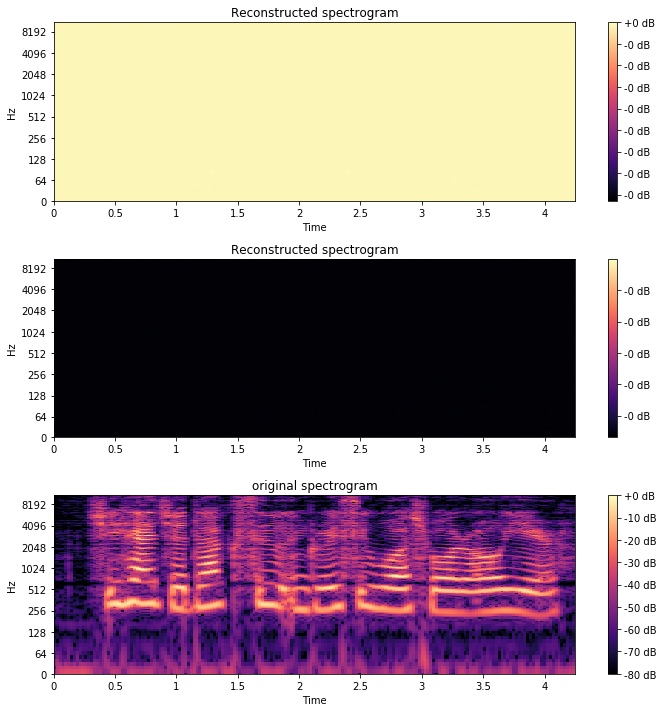

In [24]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(311)
specshow(amplitude_to_db(maskY123, ref=np.max), y_axis='log', x_axis='time')
plt.title('Reconstructed spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
ax1 = plt.subplot(312)
specshow(amplitude_to_db(maskY135, ref=np.max), y_axis='log', x_axis='time')
plt.title('Reconstructed spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.subplot(313, sharex=ax1)
specshow(amplitude_to_db(Y1, ref=np.max), y_axis='log', x_axis='time')
plt.title('original spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

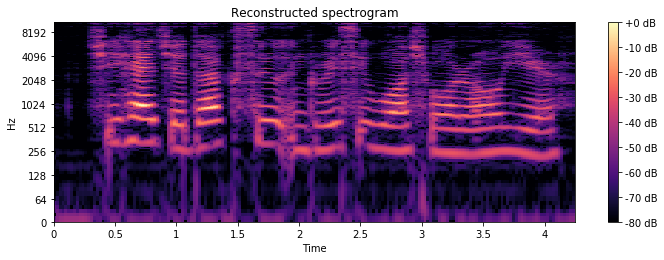

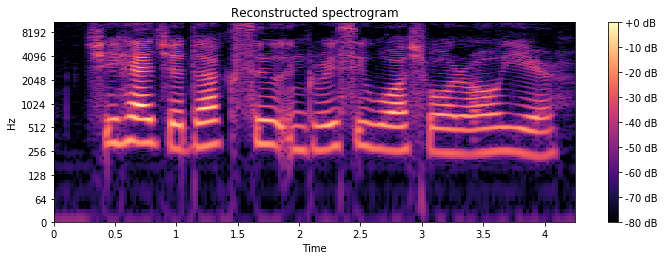

In [43]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(311)
specshow(amplitude_to_db(np.multiply(maskY16,Y1), ref=np.max), y_axis='log', x_axis='time')
plt.title('Reconstructed spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

plt.figure(figsize=(10,10))
ax1 = plt.subplot(311)
specshow(amplitude_to_db(X1, ref=np.max), y_axis='log', x_axis='time')
plt.title('Reconstructed spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()




0.08514404
0.048667677


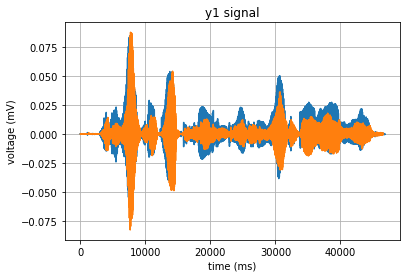

In [51]:
recon_y1_Hsgt1 = istft(np.multiply(maskY16,Y1), hop_length=hop, win_length=win) * 25
recon_y1_Hsgt10 = istft(np.multiply(np.divide(Gyy, Gyx),Y1), hop_length=hop, win_length=win) * 1000

fig, ax = plt.subplots()
ax.plot(s1)
ax.plot(recon_y1_Hsgt1)
print(np.max(s1))
print(np.max(recon_y1_Hsgt10))

ax.set(xlabel='time (ms)', ylabel='voltage (mV)',
       title='y1 signal')
ax.grid()

write_wav('removed_reverb_xy.wav', recon_y1_Hsgt1, 16000)
write_wav('removed_reverb_yx.wav', recon_y1_Hsgt10, 16000)